In [38]:
!pip install mplsoccer

<ipython-input-40-765a57e85684>:39: RuntimeWarning: invalid value encountered in true_divide
  colors = cmap(mean_distance / mean_distance.max())


<BarContainer object of 10 artists>

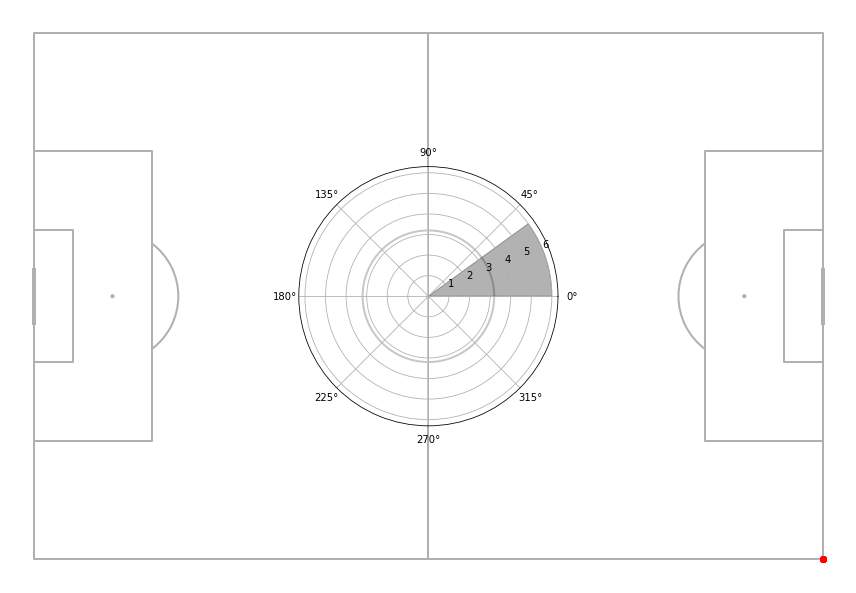

In [40]:
from mplsoccer import Pitch
import numpy as np
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r"D:\Users\Manav\Downloads\MU vs Brentford\Brentford vs MU.csv")
# plot some random data on a pitch
p = Pitch()
fig, ax = p.draw(figsize=(12, 12*p.ax_aspect))
size = 6
xstart= df.x
ystart = df.y
xend = df.endX
yend = df.endY
xstart = [120] * size
ystart = [80] * size
xend=[120]*size
yend=[80]*size
p.arrows(xstart, ystart, xend, yend, ax=ax)
p.scatter(xend, yend, ax=ax, c='red')

df=df[df['playerId']==5583]

# parameters
num_bins = 10
width = 2*np.pi/num_bins
angle, distance = p.calculate_angle_and_distance(xstart, ystart, xend,yend)

# bin angles
stats_angle = binned_statistic(angle, angle, statistic='count', bins=num_bins, range=(0, 2*np.pi))
bin_edges = stats_angle.bin_edges
count = stats_angle.statistic

# bin distance
stats_distance = binned_statistic(angle, distance, statistic='mean', bins=num_bins, range=(0, 2*np.pi))
mean_distance = np.nan_to_num(stats_distance.statistic)
cmap = plt.get_cmap('plasma_r')
colors = cmap(mean_distance / mean_distance.max())

ax_polar = fig.add_axes([0.35, 0.35, 0.3, 0.3], polar=True)
ax_polar.patch.set_alpha(0.3)
ax_polar.bar(bin_edges[:-1] + width/2, count, width=width, color=colors, edgecolor='black', alpha=0.3)

In [20]:
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,...,qualifiers/13/type/displayName,blockedX,blockedY,qualifiers/13/value,qualifiers/11/value,satisfiedEventsTypes/16,satisfiedEventsTypes/17,isGoal,qualifiers/14/type/value,qualifiers/14/type/displayName
2,2375034947,3,0,1.0,32,49.9,50.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,2375037459,58,5,15.0,32,61.3,29.0,5,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,2375037961,76,6,9.0,32,62.5,86.7,6,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,2375038111,80,6,23.0,32,65.8,77.1,6,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,2375038139,82,6,30.0,32,59.3,84.2,6,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,2375076039,891,88,39.0,32,57.3,19.0,91,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1542,2375076063,895,88,45.0,32,60.3,6.5,91,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1544,2375076075,897,88,48.0,32,57.9,6.8,91,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1628,2375077017,931,92,29.0,32,82.3,50.5,95,2,SecondHalf,...,IntentionalAssist,91.5,50.0,NaN,Center,NaN,NaN,NaN,NaN,NaN
